In [733]:
import pandas as pd
import numpy as np
import random
import matplotlib.pyplot as plt
from matplotlib import style
import seaborn as sns
import warnings
import missingno as msno
from datetime import datetime, timedelta
import plotly.express as px
import pandas as pd
from sklearn.compose import make_column_transformer, make_column_selector, ColumnTransformer
from sklearn.preprocessing import PolynomialFeatures, StandardScaler, OneHotEncoder, RobustScaler,MinMaxScaler
from sklearn.pipeline import make_pipeline, Pipeline
from sklearn.cluster import KMeans
from sklearn.preprocessing import FunctionTransformer
from sklearn import preprocessing,cluster, pipeline, compose, decomposition
from sklearn.decomposition import PCA

warnings.filterwarnings("ignore")


## Partie 1: L'analyse de l'objectif 

In [734]:
data_finale=pd.read_csv('la_base_.csv')
data_finale

,Unnamed: 0,customer_unique_id,customer_state,order_status,order_purchase_timestamp,order_delivered_customer_date,order_item_id,shipping_limit_date,price,freight_value,payment_type,payment_value,review_score,product_category_name,seller_state
0,0,861eff4711a542e4b93843c6dd7febb0,SP,delivered,2017-05-16 15:05:35,2017-05-25 10:35:35,1.0,2017-05-22 15:22:12,124.99,21.88,credit_card,146.87,4.0,moveis_escritorio,SP
1,1,290c77bc529b7ac935b93aa66c333dc3,SP,delivered,2018-01-12 20:48:24,2018-01-29 12:41:19,1.0,2018-01-18 20:58:32,289.00,46.48,credit_card,335.48,5.0,utilidades_domesticas,SC
2,2,060e732b5b29e8181a18229c7b0b2b5e,SP,delivered,2018-05-19 16:07:45,2018-06-14 17:58:51,1.0,2018-06-05 16:19:10,139.94,17.79,credit_card,157.73,5.0,moveis_escritorio,SP
3,3,259dac757896d24d7702b9acbbff3f3c,SP,delivered,2018-03-13 16:06:38,2018-03-28 16:04:25,1.0,2018-03-27 16:31:16,149.94,23.36,credit_card,173.30,5.0,moveis_escritorio,SP
4,4,345ecd01c38d18a9036ed96c73b8d066,SP,delivered,2018-07-29 09:51:30,2018-08-09 20:55:48,1.0,2018-07-31 10:10:09,230.00,22.25,credit_card,252.25,5.0,casa_conforto,SP
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
119138,119138,1a29b476fee25c95fbafc67c5ac95cf8,SP,delivered,2018-04-07 15:48:17,2018-04-13 20:06:37,1.0,2018-04-12 16:08:45,74.90,13.88,credit_card,88.78,4.0,livros_interesse_geral,SP
119139,119139,d52a67c98be1cf6a5c84435bd38d095d,SP,delivered,2018-04-04 08:20:22,2018-04-11 18:54:45,1.0,2018-04-10 08:35:12,114.90,14.16,credit_card,129.06,5.0,esporte_lazer,SP
119140,119140,e9f50caf99f032f0bf3c55141f019d99,CE,delivered,2018-04-08 20:11:50,2018-05-09 19:03:15,1.0,2018-04-12 20:30:03,37.00,19.04,credit_card,56.04,1.0,beleza_saude,SP
119141,119141,73c2643a0a458b49f58cea58833b192e,RS,delivered,2017-11-03 21:08:33,2017-11-16 19:58:39,1.0,2017-11-09 21:15:51,689.00,22.07,credit_card,711.07,5.0,relogios_presentes,SP


In [735]:
data_finale['customer_unique_id'].nunique()

96096

In [736]:
data_finale['order_item_id'].value_counts()

1.0     103645
2.0      10317
3.0       2396
4.0        995
5.0        472
6.0        265
7.0         61
8.0         37
9.0         29
10.0        26
11.0        18
12.0        13
13.0         8
14.0         7
15.0         5
16.0         3
17.0         3
18.0         3
19.0         3
20.0         3
21.0         1
Name: order_item_id, dtype: int64

<AxesSubplot:>

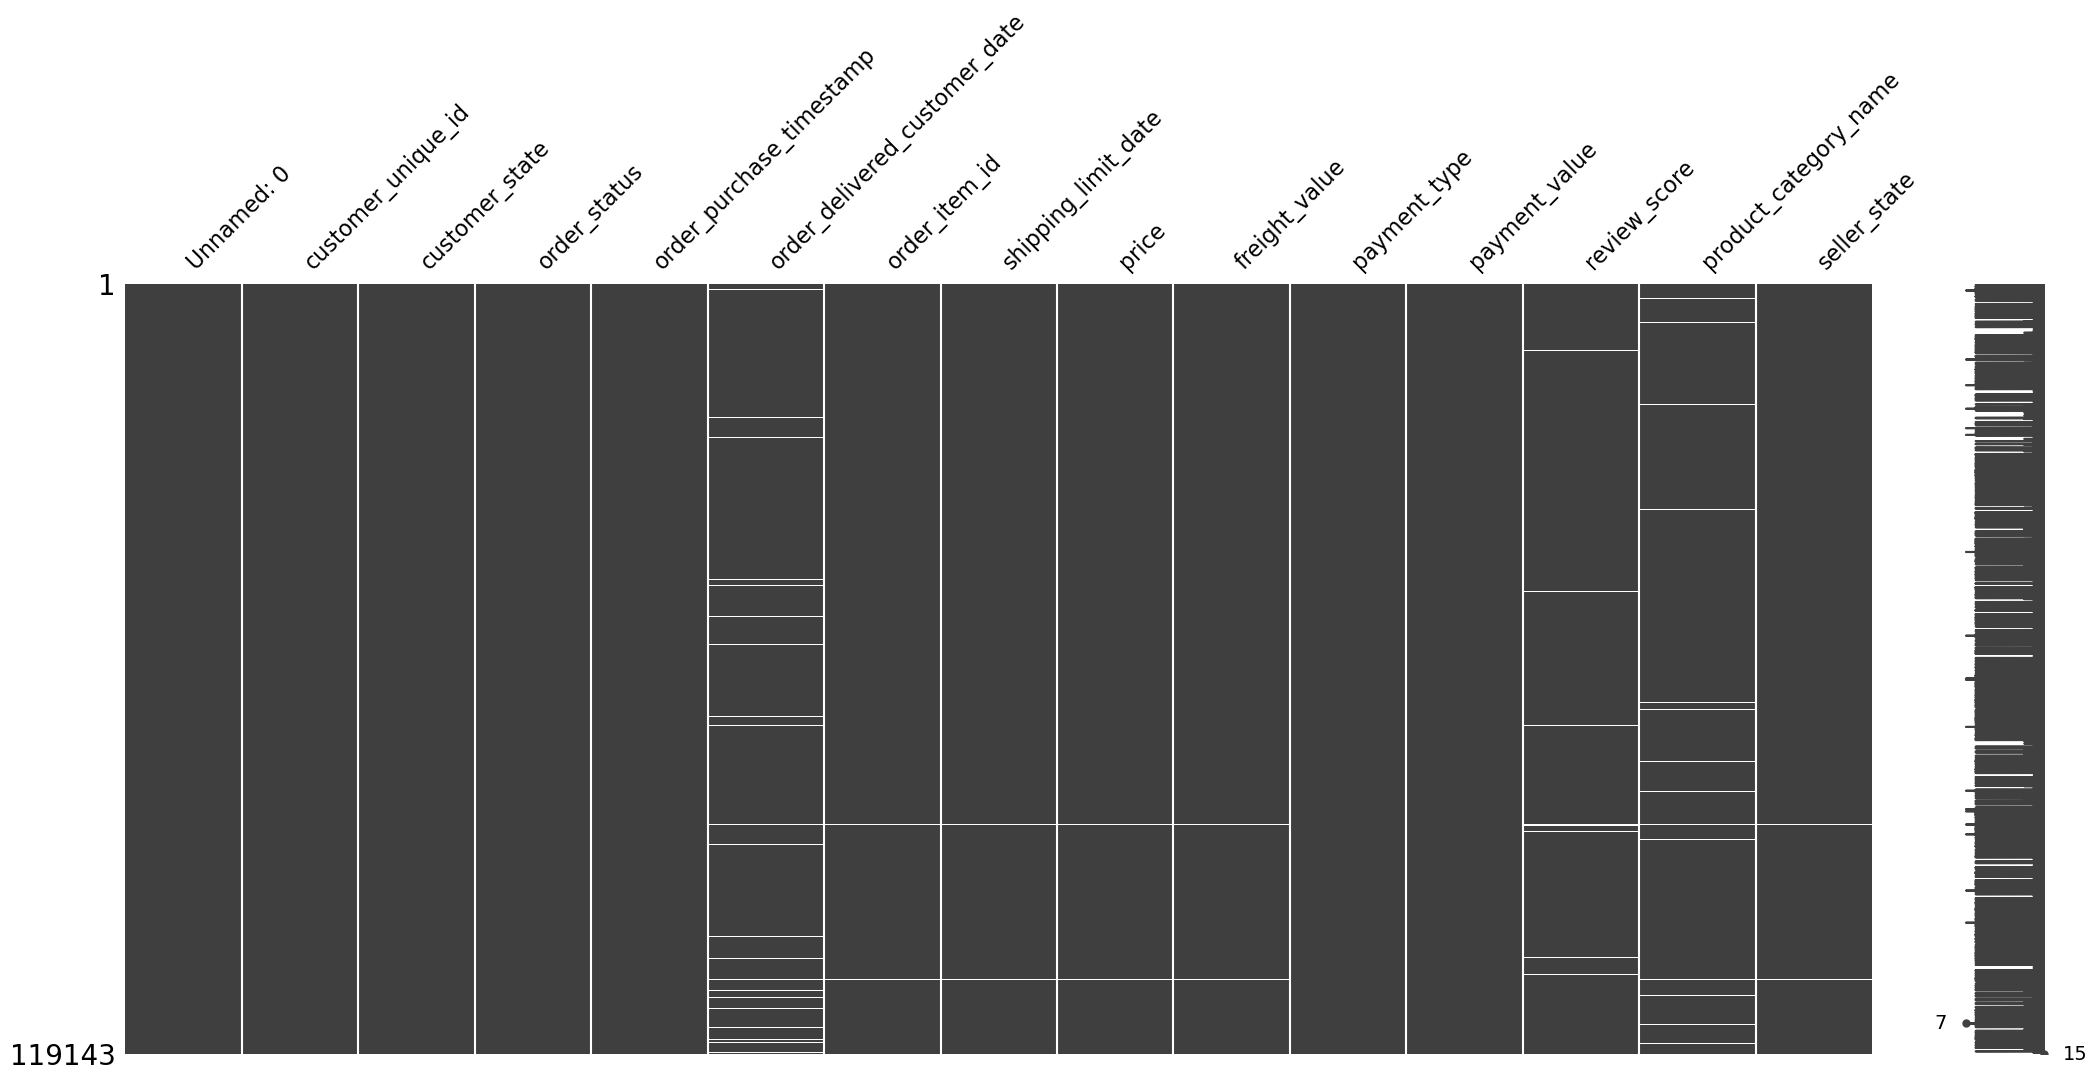

In [737]:
msno.matrix(data_finale)

In [738]:
data_finale.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 119143 entries, 0 to 119142
Data columns (total 15 columns):
 #   Column                         Non-Null Count   Dtype  
---  ------                         --------------   -----  
 0   Unnamed: 0                     119143 non-null  int64  
 1   customer_unique_id             119143 non-null  object 
 2   customer_state                 119143 non-null  object 
 3   order_status                   119143 non-null  object 
 4   order_purchase_timestamp       119143 non-null  object 
 5   order_delivered_customer_date  115722 non-null  object 
 6   order_item_id                  118310 non-null  float64
 7   shipping_limit_date            118310 non-null  object 
 8   price                          118310 non-null  float64
 9   freight_value                  118310 non-null  float64
 10  payment_type                   119140 non-null  object 
 11  payment_value                  119140 non-null  float64
 12  review_score                  

In [739]:
data_finale=data_finale.drop(['Unnamed: 0','freight_value','price','seller_state','customer_state','order_delivered_customer_date','shipping_limit_date'],axis=1)


In [740]:
data_finale

,customer_unique_id,order_status,order_purchase_timestamp,order_item_id,payment_type,payment_value,review_score,product_category_name
0,861eff4711a542e4b93843c6dd7febb0,delivered,2017-05-16 15:05:35,1.0,credit_card,146.87,4.0,moveis_escritorio
1,290c77bc529b7ac935b93aa66c333dc3,delivered,2018-01-12 20:48:24,1.0,credit_card,335.48,5.0,utilidades_domesticas
2,060e732b5b29e8181a18229c7b0b2b5e,delivered,2018-05-19 16:07:45,1.0,credit_card,157.73,5.0,moveis_escritorio
3,259dac757896d24d7702b9acbbff3f3c,delivered,2018-03-13 16:06:38,1.0,credit_card,173.30,5.0,moveis_escritorio
4,345ecd01c38d18a9036ed96c73b8d066,delivered,2018-07-29 09:51:30,1.0,credit_card,252.25,5.0,casa_conforto
...,...,...,...,...,...,...,...,...
119138,1a29b476fee25c95fbafc67c5ac95cf8,delivered,2018-04-07 15:48:17,1.0,credit_card,88.78,4.0,livros_interesse_geral
119139,d52a67c98be1cf6a5c84435bd38d095d,delivered,2018-04-04 08:20:22,1.0,credit_card,129.06,5.0,esporte_lazer
119140,e9f50caf99f032f0bf3c55141f019d99,delivered,2018-04-08 20:11:50,1.0,credit_card,56.04,1.0,beleza_saude
119141,73c2643a0a458b49f58cea58833b192e,delivered,2017-11-03 21:08:33,1.0,credit_card,711.07,5.0,relogios_presentes


In [741]:
data_finale.describe()

,order_item_id,payment_value,review_score
count,118310.000000,119140.000000,118146.000000
mean,1.196543,172.735135,4.015582
std,0.699489,267.776077,1.400436
min,1.000000,0.000000,1.000000
25%,1.000000,60.850000,4.000000
50%,1.000000,108.160000,5.000000
75%,1.000000,189.240000,5.000000
max,21.000000,13664.080000,5.000000


Text(0.5, 1.0, 'Corrélation entre les variables numériques')

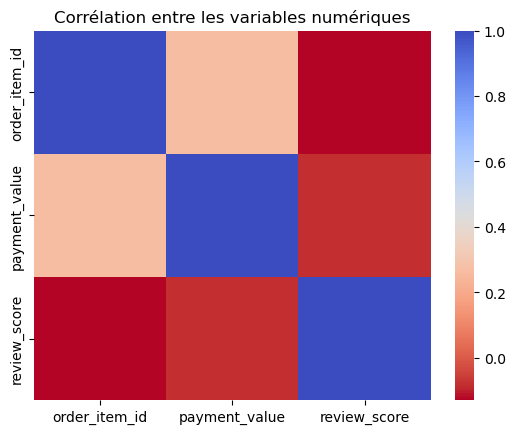

In [742]:
corrDf = data_finale.corr()
sns.heatmap(corrDf, 
        xticklabels=corrDf.columns,
        yticklabels=corrDf.columns, cmap='coolwarm_r')
plt.title('Corrélation entre les variables numériques')


In [743]:

# Utilisez groupby pour grouper les données par customer_unique_id
grouped_data = data_finale.groupby('customer_unique_id')

# Utilisez la fonction aggregate pour calculer le nombre d'articles et la valeur de paiement par client
aggregated = grouped_data.agg({'order_item_id': 'count', 'payment_value': 'sum'})

# Afficher le résultat
print(aggregated)

                                  order_item_id  payment_value
customer_unique_id                                            
0000366f3b9a7992bf8c76cfdf3221e2              1         141.90
0000b849f77a49e4a4ce2b2a4ca5be3f              1          27.19
0000f46a3911fa3c0805444483337064              1          86.22
0000f6ccb0745a6a4b88665a16c9f078              1          43.62
0004aac84e0df4da2b147fca70cf8255              1         196.89
...                                         ...            ...
fffcf5a5ff07b0908bd4e2dbc735a684              2        4134.84
fffea47cd6d3cc0a88bd621562a9d061              1          84.58
ffff371b4d645b6ecea244b27531430a              1         112.46
ffff5962728ec6157033ef9805bacc48              1         133.69
ffffd2657e2aad2907e67c3e9daecbeb              1          71.56

[96096 rows x 2 columns]


In [744]:
data_finale=pd.merge(data_finale,aggregated,on='customer_unique_id',how='left')

In [745]:
data_finale

,customer_unique_id,order_status,order_purchase_timestamp,order_item_id_x,payment_type,payment_value_x,review_score,product_category_name,order_item_id_y,payment_value_y
0,861eff4711a542e4b93843c6dd7febb0,delivered,2017-05-16 15:05:35,1.0,credit_card,146.87,4.0,moveis_escritorio,1,146.87
1,290c77bc529b7ac935b93aa66c333dc3,delivered,2018-01-12 20:48:24,1.0,credit_card,335.48,5.0,utilidades_domesticas,1,335.48
2,060e732b5b29e8181a18229c7b0b2b5e,delivered,2018-05-19 16:07:45,1.0,credit_card,157.73,5.0,moveis_escritorio,1,157.73
3,259dac757896d24d7702b9acbbff3f3c,delivered,2018-03-13 16:06:38,1.0,credit_card,173.30,5.0,moveis_escritorio,1,173.30
4,345ecd01c38d18a9036ed96c73b8d066,delivered,2018-07-29 09:51:30,1.0,credit_card,252.25,5.0,casa_conforto,1,252.25
...,...,...,...,...,...,...,...,...,...,...
119138,1a29b476fee25c95fbafc67c5ac95cf8,delivered,2018-04-07 15:48:17,1.0,credit_card,88.78,4.0,livros_interesse_geral,1,88.78
119139,d52a67c98be1cf6a5c84435bd38d095d,delivered,2018-04-04 08:20:22,1.0,credit_card,129.06,5.0,esporte_lazer,1,129.06
119140,e9f50caf99f032f0bf3c55141f019d99,delivered,2018-04-08 20:11:50,1.0,credit_card,56.04,1.0,beleza_saude,1,56.04
119141,73c2643a0a458b49f58cea58833b192e,delivered,2017-11-03 21:08:33,1.0,credit_card,711.07,5.0,relogios_presentes,1,711.07


In [746]:
data_finale.drop(['order_item_id_y','payment_value_y'],axis=1,inplace=True)

In [747]:
data_finale['review_score']=data_finale['review_score'].dropna()

In [748]:
data_finale=data_finale.drop(['order_status'],axis=1)

## Recence

In [749]:
data_finale['order_purchase_timestamp']=pd.to_datetime(data_finale['order_purchase_timestamp'])
current_date = data_finale['order_purchase_timestamp'].max() + timedelta(days = 1)


In [750]:
data_finale['recency'] = data_finale['order_purchase_timestamp'].apply(lambda x: (current_date - x).days)

## Fréquence

In [751]:
data_finale["one"]=1

In [752]:
data_freq = data_finale.groupby(data_finale.customer_unique_id).sum()

In [753]:
data_freq.reset_index(inplace=True)

In [754]:
data_freq.columns

Index(['customer_unique_id', 'order_item_id_x', 'payment_value_x',
       'review_score', 'recency', 'one'],
      dtype='object')

In [755]:
data_freq = data_freq[['customer_unique_id', 'one']]

In [756]:
data_finale=pd.merge(data_finale,data_freq,left_on='customer_unique_id',right_on='customer_unique_id',how='left')

In [757]:
data_finale.drop(['one_x'],axis=1,inplace=True)

In [758]:

data_finale=data_finale.rename(columns = {'one_y': 'frequency'}) 

In [759]:
data_finale['frequency'].unique()

array([ 1,  2,  3,  6,  5,  4,  8, 11,  9,  7, 13, 10, 12, 35, 14, 15, 19,
       17, 24, 20, 75, 22, 29, 18, 21, 38, 16, 26])

## Montant

In [760]:
data_finale['Montant'] =data_finale['payment_value_x']

# Utilisez la fonction aggregate pour calculer le nombre d'articles et la valeur de paiement par client


In [761]:
data_finale

,customer_unique_id,order_purchase_timestamp,order_item_id_x,payment_type,payment_value_x,review_score,product_category_name,recency,frequency,Montant
0,861eff4711a542e4b93843c6dd7febb0,2017-05-16 15:05:35,1.0,credit_card,146.87,4.0,moveis_escritorio,520,1,146.87
1,290c77bc529b7ac935b93aa66c333dc3,2018-01-12 20:48:24,1.0,credit_card,335.48,5.0,utilidades_domesticas,278,1,335.48
2,060e732b5b29e8181a18229c7b0b2b5e,2018-05-19 16:07:45,1.0,credit_card,157.73,5.0,moveis_escritorio,152,1,157.73
3,259dac757896d24d7702b9acbbff3f3c,2018-03-13 16:06:38,1.0,credit_card,173.30,5.0,moveis_escritorio,219,1,173.30
4,345ecd01c38d18a9036ed96c73b8d066,2018-07-29 09:51:30,1.0,credit_card,252.25,5.0,casa_conforto,81,1,252.25
...,...,...,...,...,...,...,...,...,...,...
119138,1a29b476fee25c95fbafc67c5ac95cf8,2018-04-07 15:48:17,1.0,credit_card,88.78,4.0,livros_interesse_geral,194,1,88.78
119139,d52a67c98be1cf6a5c84435bd38d095d,2018-04-04 08:20:22,1.0,credit_card,129.06,5.0,esporte_lazer,197,1,129.06
119140,e9f50caf99f032f0bf3c55141f019d99,2018-04-08 20:11:50,1.0,credit_card,56.04,1.0,beleza_saude,192,1,56.04
119141,73c2643a0a458b49f58cea58833b192e,2017-11-03 21:08:33,1.0,credit_card,711.07,5.0,relogios_presentes,348,1,711.07


In [762]:
from collections import Counter

In [763]:
translator = {'beleza_saude': 'health_beauty',
 'informatica_acessorios': 'computers_accessories',
 'automotivo': 'auto',
 'cama_mesa_banho': 'bed_bath_table',
 'moveis_decoracao': 'furniture_decor',
 'esporte_lazer': 'sports_leisure',
 'perfumaria': 'perfumery',
 'utilidades_domesticas': 'housewares',
 'telefonia': 'telephony',
 'relogios_presentes': 'watches_gifts',
 'alimentos_bebidas': 'food_drink',
 'bebes': 'baby',
 'papelaria': 'stationery',
 'tablets_impressao_imagem': 'tablets_printing_image',
 'brinquedos': 'toys',
 'telefonia_fixa': 'fixed_telephony',
 'ferramentas_jardim': 'garden_tools',
 'fashion_bolsas_e_acessorios': 'fashion_bags_accessories',
 'eletroportateis': 'small_appliances',
 'consoles_games': 'consoles_games',
 'audio': 'audio',
 'fashion_calcados': 'fashion_shoes',
 'cool_stuff': 'cool_stuff',
 'malas_acessorios': 'luggage_accessories',
 'climatizacao': 'air_conditioning',
 'construcao_ferramentas_construcao': 'construction_tools_construction',
 'moveis_cozinha_area_de_servico_jantar_e_jardim': 'kitchen_dining_laundry_garden_furniture',
 'construcao_ferramentas_jardim': 'costruction_tools_garden',
 'fashion_roupa_masculina': 'fashion_male_clothing',
 'pet_shop': 'pet_shop',
 'moveis_escritorio': 'office_furniture',
 'market_place': 'market_place',
 'eletronicos': 'electronics',
 'eletrodomesticos': 'home_appliances',
 'artigos_de_festas': 'party_supplies',
 'casa_conforto': 'home_confort',
'construcao_ferramentas_ferramentas': 'costruction_tools_tools',
 'agro_industria_e_comercio': 'agro_industry_and_commerce',
 'moveis_colchao_e_estofado': 'furniture_mattress_and_upholstery',
 'livros_tecnicos': 'books_technical',
 'casa_construcao': 'home_construction',
 'instrumentos_musicais': 'musical_instruments',
 'moveis_sala': 'furniture_living_room',
 'construcao_ferramentas_iluminacao': 'construction_tools_lights',
 'industria_comercio_e_negocios': 'industry_commerce_and_business',
 'alimentos': 'food',
 'artes': 'art',
 'moveis_quarto': 'furniture_bedroom',
 'livros_interesse_geral': 'books_general_interest',
 'construcao_ferramentas_seguranca': 'construction_tools_safety',
 'fashion_underwear_e_moda_praia': 'fashion_underwear_beach',
 'fashion_esporte': 'fashion_sport',
 'sinalizacao_e_seguranca': 'signaling_and_security',
 'pcs': 'computers',
 'artigos_de_natal': 'christmas_supplies',
 'fashion_roupa_feminina': 'fashio_female_clothing',
 'eletrodomesticos_2': 'home_appliances_2',
 'livros_importados': 'books_imported',
 'bebidas': 'drinks',
 'cine_foto': 'cine_photo',
 'la_cuisine': 'la_cuisine',
 'musica': 'music',
 'casa_conforto_2': 'home_comfort_2',
 'portateis_casa_forno_e_cafe': 'small_appliances_home_oven_and_coffee',
 'cds_dvds_musicais': 'cds_dvds_musicals',
 'dvds_blu_ray': 'dvds_blu_ray',
 'flores': 'flowers',
 'artes_e_artesanato': 'arts_and_craftmanship',
 'fraldas_higiene': 'diapers_and_hygiene',
 'fashion_roupa_infanto_juvenil': 'fashion_childrens_clothes',
 'seguros_e_servicos': 'security_and_services',
 'portateis_cozinha_e_preparadores_de_alimentos': 'portable_kitchen_food_preparers',
 'pc_gamer': 'pc_gamer'}

# Traduire la colonne des catégories

data_finale["product_category_name"] = data_finale["product_category_name"].map(translator)

data_finale["product_category_name"]

categories = {

 'health_beauty': 'Health_Beauty',
 'perfumery': 'Health_Beauty',
 'computers': 'Technology',
 'pc_gamer' : 'Technology',
 'computers_accessories': 'Technology',
 'electronics': 'Technology',
 'tablets_printing_image': 'Technology',
 'telephony': 'Technology',
 'fixed_telephony': 'Technology',
 'auto': 'Automotive',
 'small_appliances_home_oven_and_coffee': 'Home',
 'home_comfort_2': 'Home',
 'home_appliances_2': 'Home',
 'home_confort': 'Home',
 'air_conditioning': 'Home',
 'small_appliances': 'Home',
 'bed_bath_table': 'Home',
 'furniture_decor': 'Home',
 'housewares': 'Home',
 'home_appliances': 'Home',
 'home_comfort': 'Home',
 'kitchen_dining_laundry_garden_furniture': 'Home',
 'portable_kitchen_food_preparers' : 'Home',
 'fashio_female_clothing': 'Fashion_Accessories',
 'luggage_accessories': 'Fashion_Accessories',
 'fashion_bags_accessories': 'Fashion_Accessories',
 'fashion_shoes': 'Fashion_Accessories',
 'watches_gifts': 'Fashion_Accessories',
 'fashion_male_clothing': 'Fashion_Accessories',
 'fashion_female_clothing': 'Fashion_Accessories',
 'fashion_childrens_clothes': 'Fashion_Accessories',
 'fashion_underwear_beach': 'Fashion_Accessories',
 'fashion_sport': 'Fashion_Accessories',
 'sports_leisure': 'Sports_Leisure',
 'food_drink': 'Food_Beverage',
 'la_cuisine': 'Food_Beverage',
 'food': 'Food_Beverage',
 'drinks': 'Food_Beverage',
 'baby': 'Baby',
 'diapers_and_hygiene': 'Baby',
 'stationery': 'Office_Supplies',
 'office_furniture': 'Office_Supplies',
 'flowers': 'Gardening',
 'costruction_tools_garden': 'Gardening',
 'books_general_interest': 'Books',
 'books_technical': 'Books',
 'books_imported': 'Books',
'cds_dvds_musicals': 'Books',
 'dvds_blu_ray': 'Books',
 'art': 'Arts_Music',
 'audio': 'Arts_Music',
 'music': 'Arts_Music',
 'arts_and_craftmanship': 'Arts_Music',
 'cine_photo': 'Arts_Music',
 'musical_instruments': 'Arts_Music',
 'toys': 'Toys_Games',
 'consoles_games': 'Toys_Games',
 'cool_stuff': 'Toys_Games',
 'party_supplies': 'Party_Supplies',
 'christmas_supplies': 'Party_Supplies',
 'home_construction': 'Construction_Tools',
 'costruction_tools_tools': 'Construction_Tools',
 'construction_tools_construction': 'Construction_Tools',
 'garden_tools': 'Construction_Tools',
 'construction_tools_lights': 'Construction_Tools',
 'construction_tools_safety': 'Construction_Tools',
 'pet_shop': 'Pet_Supplies',
 'industry_commerce_and_business': 'Agro_Industry_Commerce',
 'agro_industry_and_commerce': 'Agro_Industry_Commerce',
 'furniture_mattress_and_upholstery': 'Furniture',
 'furniture_living_room': 'Furniture',
 'furniture_bedroom': 'Furniture',
 'market_place': 'Market_place',
 'signaling_and_security': 'Signaling_Security',
 'security_and_services': 'Signaling_Security'
 
 }




data_finale["product_category_name"] = data_finale["product_category_name"].map(categories)



In [764]:
data_finale['product_category_name'].fillna('unknown',inplace=True)

In [765]:
data_finale.columns

Index(['customer_unique_id', 'order_purchase_timestamp', 'order_item_id_x',
       'payment_type', 'payment_value_x', 'review_score',
       'product_category_name', 'recency', 'frequency', 'Montant'],
      dtype='object')

In [766]:
data_finale

,customer_unique_id,order_purchase_timestamp,order_item_id_x,payment_type,payment_value_x,review_score,product_category_name,recency,frequency,Montant
0,861eff4711a542e4b93843c6dd7febb0,2017-05-16 15:05:35,1.0,credit_card,146.87,4.0,Office_Supplies,520,1,146.87
1,290c77bc529b7ac935b93aa66c333dc3,2018-01-12 20:48:24,1.0,credit_card,335.48,5.0,Home,278,1,335.48
2,060e732b5b29e8181a18229c7b0b2b5e,2018-05-19 16:07:45,1.0,credit_card,157.73,5.0,Office_Supplies,152,1,157.73
3,259dac757896d24d7702b9acbbff3f3c,2018-03-13 16:06:38,1.0,credit_card,173.30,5.0,Office_Supplies,219,1,173.30
4,345ecd01c38d18a9036ed96c73b8d066,2018-07-29 09:51:30,1.0,credit_card,252.25,5.0,Home,81,1,252.25
...,...,...,...,...,...,...,...,...,...,...
119138,1a29b476fee25c95fbafc67c5ac95cf8,2018-04-07 15:48:17,1.0,credit_card,88.78,4.0,Books,194,1,88.78
119139,d52a67c98be1cf6a5c84435bd38d095d,2018-04-04 08:20:22,1.0,credit_card,129.06,5.0,Sports_Leisure,197,1,129.06
119140,e9f50caf99f032f0bf3c55141f019d99,2018-04-08 20:11:50,1.0,credit_card,56.04,1.0,Health_Beauty,192,1,56.04
119141,73c2643a0a458b49f58cea58833b192e,2017-11-03 21:08:33,1.0,credit_card,711.07,5.0,Fashion_Accessories,348,1,711.07


In [767]:
def get_mode(x):
    return x.mode().iloc[0]

In [768]:
agg_dict = {
    'customer_unique_id':get_mode,
    'order_item_id_x':'max',
 'frequency': 'max',
 'recency':'max',
 'Montant':'max',
 'payment_type':get_mode,
 'review_score': 'mean',
 'product_category_name':get_mode,}

In [769]:
data_finale=data_finale.dropna()

In [770]:
data_finale=data_finale.groupby(by='customer_unique_id').agg(agg_dict)


In [771]:
data_finale

,customer_unique_id,order_item_id_x,frequency,recency,Montant,payment_type,review_score,product_category_name
customer_unique_id,,,,,,,,
0000366f3b9a7992bf8c76cfdf3221e2,0000366f3b9a7992bf8c76cfdf3221e2,1.0,1,161,141.90,credit_card,5.0,Home
0000b849f77a49e4a4ce2b2a4ca5be3f,0000b849f77a49e4a4ce2b2a4ca5be3f,1.0,1,164,27.19,credit_card,4.0,Health_Beauty
0000f46a3911fa3c0805444483337064,0000f46a3911fa3c0805444483337064,1.0,1,586,86.22,credit_card,3.0,Office_Supplies
0000f6ccb0745a6a4b88665a16c9f078,0000f6ccb0745a6a4b88665a16c9f078,1.0,1,370,43.62,credit_card,4.0,Technology
0004aac84e0df4da2b147fca70cf8255,0004aac84e0df4da2b147fca70cf8255,1.0,1,337,196.89,credit_card,5.0,Technology
...,...,...,...,...,...,...,...,...
fffcf5a5ff07b0908bd4e2dbc735a684,fffcf5a5ff07b0908bd4e2dbc735a684,2.0,2,496,2067.42,credit_card,5.0,Health_Beauty
fffea47cd6d3cc0a88bd621562a9d061,fffea47cd6d3cc0a88bd621562a9d061,1.0,1,311,84.58,credit_card,4.0,Baby
ffff371b4d645b6ecea244b27531430a,ffff371b4d645b6ecea244b27531430a,1.0,1,618,112.46,credit_card,5.0,Automotive


In [772]:
data_finale=data_finale.drop(['customer_unique_id'],axis=1)

In [773]:
data_finale

,order_item_id_x,frequency,recency,Montant,payment_type,review_score,product_category_name
customer_unique_id,,,,,,,
0000366f3b9a7992bf8c76cfdf3221e2,1.0,1,161,141.90,credit_card,5.0,Home
0000b849f77a49e4a4ce2b2a4ca5be3f,1.0,1,164,27.19,credit_card,4.0,Health_Beauty
0000f46a3911fa3c0805444483337064,1.0,1,586,86.22,credit_card,3.0,Office_Supplies
0000f6ccb0745a6a4b88665a16c9f078,1.0,1,370,43.62,credit_card,4.0,Technology
0004aac84e0df4da2b147fca70cf8255,1.0,1,337,196.89,credit_card,5.0,Technology
...,...,...,...,...,...,...,...
fffcf5a5ff07b0908bd4e2dbc735a684,2.0,2,496,2067.42,credit_card,5.0,Health_Beauty
fffea47cd6d3cc0a88bd621562a9d061,1.0,1,311,84.58,credit_card,4.0,Baby
ffff371b4d645b6ecea244b27531430a,1.0,1,618,112.46,credit_card,5.0,Automotive


## Séparation des colonnes 

In [774]:
numerique= list(data_finale.select_dtypes(['float64', 'int64']).columns)
categorielles = list(data_finale.select_dtypes(['object', 'category']).columns)

## Modélisation (Non-supervisé)

In [775]:
numerical_features = make_column_selector(dtype_include=np.number)
categorical_features = make_column_selector(dtype_exclude=np.number)

numerical_transformer = make_pipeline(
    FunctionTransformer(func=np.abs),
    FunctionTransformer(func=np.log1p),
    StandardScaler()
    
    
)

preprocessor = make_column_transformer(
    (numerical_transformer, numerique),
    (OneHotEncoder(sparse=False), categorielles)
)

Text(0, 0.5, 'Inertie')

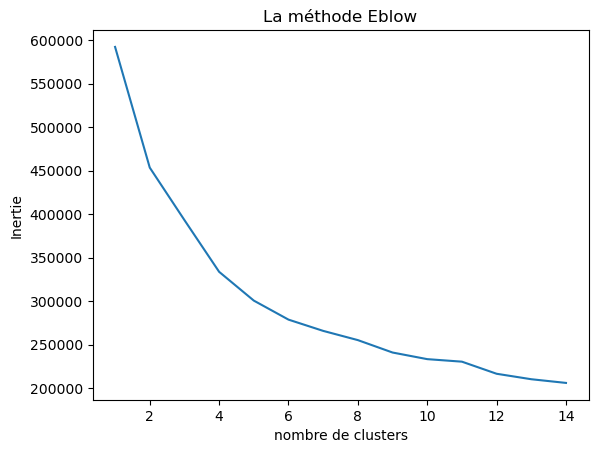

In [776]:
tab= []
for i in range (1,15):
    kmeans=KMeans(n_clusters=i,random_state=0)
    pipe_kmeans=make_pipeline(preprocessor,kmeans)
    pipe_kmeans.fit (data_finale)
    tab.append(kmeans.inertia_)
plt.plot (range (1,15), tab)
plt.title ("La méthode Eblow")
plt.xlabel("nombre de clusters")
plt.ylabel("Inertie")

In [777]:
kmeans=KMeans(n_clusters=5,random_state=0)
pipe_kmeans=make_pipeline(preprocessor,PCA(n_components=0.9))
data_f=pd.DataFrame(pipe_kmeans.fit_transform(data_finale))
cluster=kmeans.fit_predict(data_f)

In [778]:
data_finale['cluster_labels']=cluster

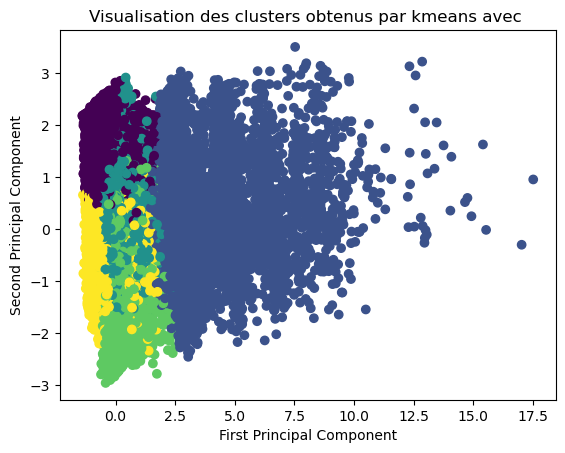

In [779]:

plt.scatter(data_f.iloc[:,0],data_f.iloc[:,1],c=cluster)
plt.xlabel('First Principal Component')
plt.ylabel('Second Principal Component')
plt.title('Visualisation des clusters obtenus par kmeans avec ')
plt.show()

In [780]:
data_finale=data_finale.groupby('cluster_labels').agg({'order_item_id_x':'mean', 
                                                   'review_score':'mean',
                                                 'recency':'mean',
                                                 'frequency':'mean', 
                                                 'Montant':'mean',
                                                  'payment_type':lambda x :x.value_counts().index[0],
                                                  'product_category_name':	lambda x :x.value_counts().index[0]})
	

In [781]:
data_finale

,order_item_id_x,review_score,recency,frequency,Montant,payment_type,product_category_name
cluster_labels,,,,,,,
0,1.000000,4.600471,115.818349,1.036047,117.469060,credit_card,Home
1,2.350956,3.630400,296.504182,2.787933,243.231485,credit_card,Home
2,1.000000,4.561555,343.746043,1.054375,295.015724,credit_card,Home
3,1.000000,1.194477,297.100605,1.050449,163.463234,credit_card,Home
4,1.000000,4.546226,368.001170,1.074913,64.662368,credit_card,Home


In [782]:
data_final1=data_finale.groupby('cluster_labels').agg({'order_item_id_x':'mean', 
                                                   'review_score':'mean',
                                                 'recency':'mean',
                                                 'frequency':'mean', 
                                                 'Montant':'mean',
                                                 })
	

In [783]:
data_final1

,order_item_id_x,review_score,recency,frequency,Montant
cluster_labels,,,,,
0,1.000000,4.600471,115.818349,1.036047,117.469060
1,2.350956,3.630400,296.504182,2.787933,243.231485
2,1.000000,4.561555,343.746043,1.054375,295.015724
3,1.000000,1.194477,297.100605,1.050449,163.463234
4,1.000000,4.546226,368.001170,1.074913,64.662368


In [784]:
data_final1["recency"] = (data_final1["recency"]/data_final1["recency"].max())*5
data_final1["order_item_id_x"] = (data_final1["order_item_id_x"]/data_final1["order_item_id_x"].max())*5
data_final1["review_score"] = (data_final1["review_score"]/data_final1["review_score"].max())*5
data_final1["frequency"] = (data_final1["frequency"]/data_final1["frequency"].max())*5
data_final1["Montant"] = (data_final1["Montant"]/data_final1["Montant"].max())*5





In [785]:
data_final1

,order_item_id_x,review_score,recency,frequency,Montant
cluster_labels,,,,,
0,2.126795,5.000000,1.573614,1.858091,1.990895
1,5.000000,3.945683,4.028577,5.000000,4.122348
2,2.126795,4.957705,4.670448,1.890962,5.000000
3,2.126795,1.298212,4.036680,1.883921,2.770416
4,2.126795,4.941044,5.000000,1.927796,1.095914


In [786]:
import plotly.graph_objects as go
# Créer une figure en radar pour chaque cluster
fig = go.Figure()

for cluster, row in data_final1.iterrows():
    values = row.values.tolist()




    fig.add_trace(go.Scatterpolar(
        r=values,
        theta=data_final1.columns,
        fill='toself',
        name=f'Cluster {cluster}'
    ))

# Mettre en forme la figurenum_cols,
fig.update_layout(
    polar=dict(
        radialaxis=dict(
            visible=True,
            range=[0,5]
        ),
    ),
    showlegend=True,
    width=780,
    height=780

)

# Afficher la figure
fig.show()
figsize = (60,60)